In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv("SkillCraft1_Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

###### We observe here that three columns are of object type. Something is wrong with these columns and it must be corrected.# 

In [3]:
df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


###### We can see that some players have not given any information and therefore their value indicated by the question mark is missing#

###### So we will clean the dataset.
###### To do this, we will remove the missing values from the dataset, then calculate the average of each column that has a problem, then assign the average to the rows that have a question mark.

In [4]:
df.isin(['?']).sum(axis=0)

GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

In [5]:
df.loc[df['Age'] == '?']

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3340,10001,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
3343,10015,8,?,?,?,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000
3344,10016,8,?,?,?,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.000000
3345,10017,8,?,?,?,245.8188,0.010471,0.000841,10,0.000657,0.001314,0.005031,14.5518,36.7134,7.1943,33,0.001474,11,0.000040,0.000048
3346,10018,8,?,?,?,211.0722,0.013049,0.000940,10,0.000366,0.000909,0.003719,19.6169,38.9326,7.1320,23,0.000898,9,0.000000,0.000000
3347,10021,8,?,?,?,189.5778,0.007559,0.000487,10,0.000606,0.000566,0.005821,22.0317,36.7330,4.9050,28,0.000540,5,0.000000,0.000000
3348,10022,8,?,?,?,210.5088,0.007974,0.000867,7,0.000548,0.000638,0.006518,15.7856,30.7156,4.8058,34,0.000817,6,0.000000,0.000000
3349,10023,8,?,?,?,248.0118,0.014722,0.001752,7,0.000375,0.000110,0.004115,17.4656,34.2357,7.8973,20,0.001111,8,0.000000,0.000000


In [6]:
df2 = df.iloc[0:3340]

In [7]:
df2

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,9261,4,20,8,400,158.1390,0.013829,0.000504,7,0.000217,0.000313,0.003583,36.3990,66.2718,4.5097,30,0.001035,7,0.0,0.000287
3336,9264,5,16,56,1500,186.1320,0.006951,0.000360,6,0.000083,0.000166,0.005414,22.8615,34.7417,4.9309,38,0.001343,7,0.0,0.000388
3337,9265,4,21,8,100,121.6992,0.002956,0.000241,8,0.000055,0.000208,0.003690,35.5833,57.9585,5.4154,23,0.002014,7,0.0,0.000000
3338,9270,3,20,28,400,134.2848,0.005424,0.000182,5,0.000000,0.000480,0.003205,18.2927,62.4615,6.0202,18,0.000934,5,0.0,0.000000


In [8]:
df2 = df2.astype({"Age": int})
a = df2['Age'].mean()
a

21.647904191616767

In [9]:
df.loc[df.Age == "?", "Age"] = a

In [10]:
df.loc[df['HoursPerWeek'] == '?']

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
1841,5255,5,18,?,?,122.2470,0.006357,0.000433,3,0.000014,0.000257,0.003043,30.8929,62.2933,5.3822,23,0.001055,5,0.000000,0.000338
3340,10001,8,21.647904,?,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,21.647904,?,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,21.647904,?,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
3343,10015,8,21.647904,?,?,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000
3344,10016,8,21.647904,?,?,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.000000
3345,10017,8,21.647904,?,?,245.8188,0.010471,0.000841,10,0.000657,0.001314,0.005031,14.5518,36.7134,7.1943,33,0.001474,11,0.000040,0.000048
3346,10018,8,21.647904,?,?,211.0722,0.013049,0.000940,10,0.000366,0.000909,0.003719,19.6169,38.9326,7.1320,23,0.000898,9,0.000000,0.000000
3347,10021,8,21.647904,?,?,189.5778,0.007559,0.000487,10,0.000606,0.000566,0.005821,22.0317,36.7330,4.9050,28,0.000540,5,0.000000,0.000000
3348,10022,8,21.647904,?,?,210.5088,0.007974,0.000867,7,0.000548,0.000638,0.006518,15.7856,30.7156,4.8058,34,0.000817,6,0.000000,0.000000


In [11]:
df2 = df.iloc[0:3339]

In [12]:
df2

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,9260,4,23,36,1500,96.6198,0.001471,0.000371,3,0.000000,0.000286,0.002614,47.2967,82.3825,6.0383,22,0.000514,5,0.0,0.000000
3335,9261,4,20,8,400,158.1390,0.013829,0.000504,7,0.000217,0.000313,0.003583,36.3990,66.2718,4.5097,30,0.001035,7,0.0,0.000287
3336,9264,5,16,56,1500,186.1320,0.006951,0.000360,6,0.000083,0.000166,0.005414,22.8615,34.7417,4.9309,38,0.001343,7,0.0,0.000388
3337,9265,4,21,8,100,121.6992,0.002956,0.000241,8,0.000055,0.000208,0.003690,35.5833,57.9585,5.4154,23,0.002014,7,0.0,0.000000


In [13]:
df2 = df2.drop(df2.index[1841])

In [14]:
df2 = df2.astype({"HoursPerWeek": int})
a = df2['HoursPerWeek'].mean()
a

15.91372079089275

In [15]:
df.loc[df.HoursPerWeek == "?", "HoursPerWeek"] = a

In [16]:
df.loc[df['TotalHours'] == '?']

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
358,1064,5,17,20,?,94.4724,0.003846,0.000783,3,0.000010,0.000135,0.004474,50.5455,54.9287,3.0972,31,0.000763,7,0.000106,0.000116
1841,5255,5,18,15.913721,?,122.2470,0.006357,0.000433,3,0.000014,0.000257,0.003043,30.8929,62.2933,5.3822,23,0.001055,5,0.000000,0.000338
3340,10001,8,21.647904,15.913721,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,21.647904,15.913721,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,21.647904,15.913721,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
3343,10015,8,21.647904,15.913721,?,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000
3344,10016,8,21.647904,15.913721,?,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.000000
3345,10017,8,21.647904,15.913721,?,245.8188,0.010471,0.000841,10,0.000657,0.001314,0.005031,14.5518,36.7134,7.1943,33,0.001474,11,0.000040,0.000048
3346,10018,8,21.647904,15.913721,?,211.0722,0.013049,0.000940,10,0.000366,0.000909,0.003719,19.6169,38.9326,7.1320,23,0.000898,9,0.000000,0.000000
3347,10021,8,21.647904,15.913721,?,189.5778,0.007559,0.000487,10,0.000606,0.000566,0.005821,22.0317,36.7330,4.9050,28,0.000540,5,0.000000,0.000000


In [17]:
df2 = df.iloc[0:3339]

In [18]:
df2 = df2.drop(df2.index[358])

In [19]:
df2 = df2.drop(df2.index[1840])

In [20]:
df2 = df2.astype({"TotalHours": int})
a = df2['TotalHours'].mean()
a

960.5897512735991

In [21]:
df.loc[df.TotalHours == "?", "TotalHours"] = a

In [22]:
df.isin(['?']).sum(axis=0) #dataset cleaned

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

###### We managed to keep the problematic lines, and the dataset is now usable.#

In [23]:
df['Age']=df['Age'].astype(np.int64)
df['HoursPerWeek']=df['HoursPerWeek'].astype(np.int64)
df['TotalHours']=df['TotalHours'].astype(np.int64)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   int64  
 3   HoursPerWeek          3395 non-null   int64  
 4   TotalHours            3395 non-null   int64  
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

###### The types of all the columns are good, let's start visualizing the data!#

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="whitegrid")


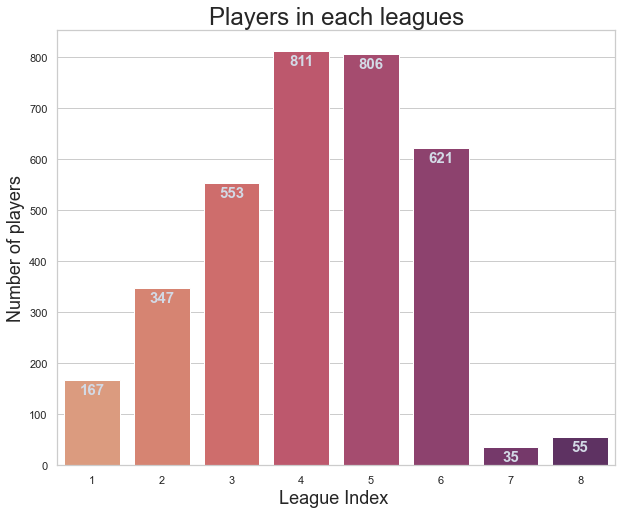

In [26]:

ax = sns.countplot(x="LeagueIndex", data = df, palette="flare")
plt.title("Players in each leagues", fontsize =24)
plt.ylabel('Number of players', fontsize=18)
plt.xlabel('League Index ', fontsize=18)
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), xy=(p.get_x() + 0.4, p.get_height() - 20), fontsize=15, color='#d3dae6', ha='center', va="center", weight='bold')

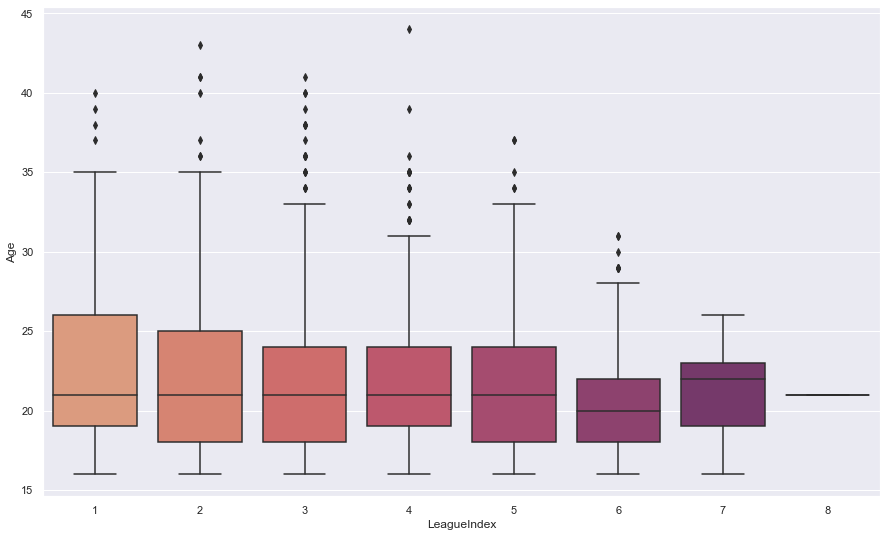

In [27]:

sns.set(rc={'figure.figsize':(15,9)})
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="Age", data=df,palette='flare')




###### Remember the values that had a question mark at the beginning? They were the lines of the professional players, in category 8.
###### Since we have replaced their values by the average of the others, it is normal that on the plot we have only one line, they all have the same value.
###### We will thus have this line of equal values for the plots of the three columns.

In [28]:
dfInterval = df.drop(df[df.LeagueIndex == 8].index)

Text(0, 0.5, 'Number of players (%)')

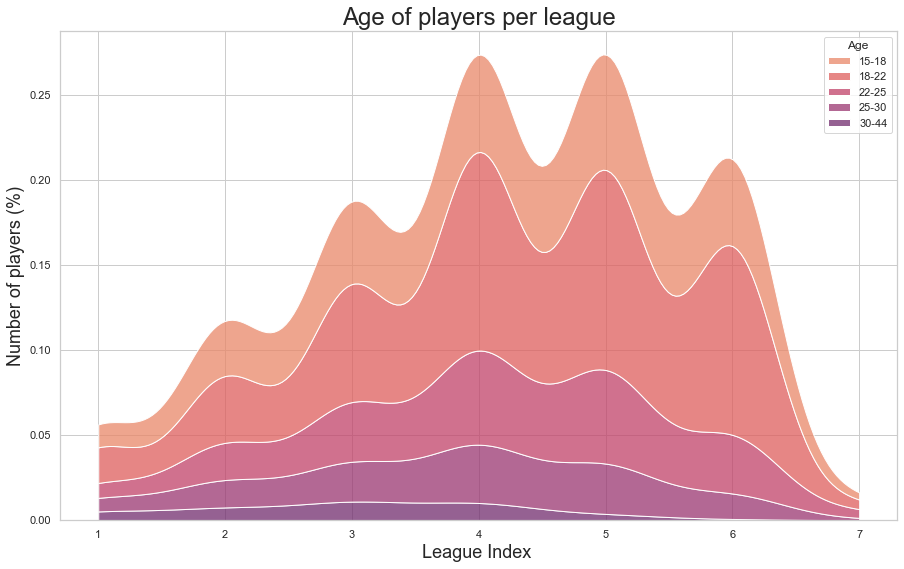

In [29]:
#CODE PLOT AGE EN FCT LEAGUEINDEX


dfInterval.Age = pd.cut(df.Age, bins=[15, 18, 22, 25, 30, 45], 
                        include_lowest=True, precision=0, ordered = False, labels = ["15-18", "18-22", "22-25", "25-30", "30-44", ])
from matplotlib.ticker import FuncFormatter

ax = sns.kdeplot(x="LeagueIndex", hue="Age", data = dfInterval, shade=True, palette="flare", cut=0, multiple="stack")
plt.title("Age of players per league", fontsize =24)
plt.xlabel('League Index ', fontsize=18)
plt.ylabel('Number of players (%)', fontsize=18)

#FIN

###### Here is another graph, nicer.

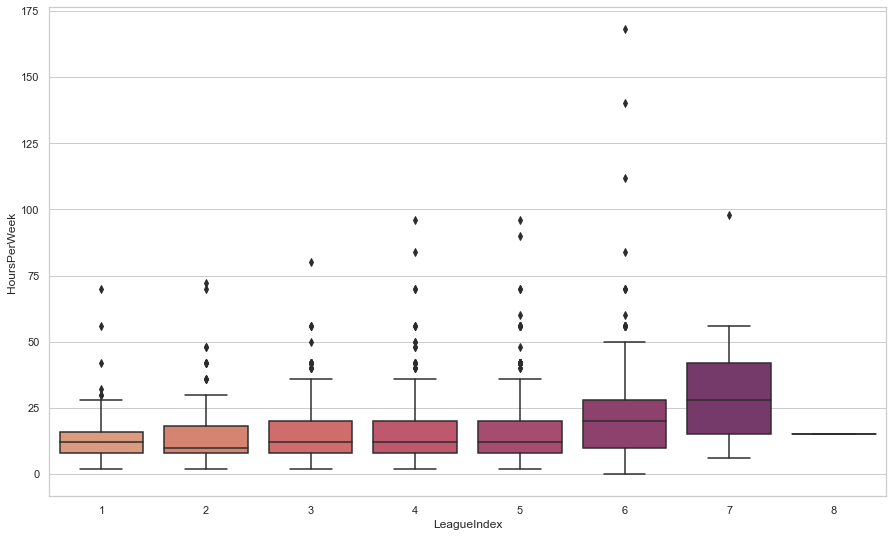

In [30]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="HoursPerWeek", data=df,palette='flare')


###### We have our first trend!
###### It is quite trivial and logical.
###### We observe that the more hours we play per week, the better we are!
###### In competitive games like Starcraft2, being good means playing a lot. It's a very complicated game to master and requires a lot of skills. Players have to practice more and more to progress.
###### One player indicated that he plays 168 hours a week, so either this player was mistaken or he's investing a little too much in the game! (24*7 = 168 hours for a full week)
###### He is rank 6 and determined to move up!

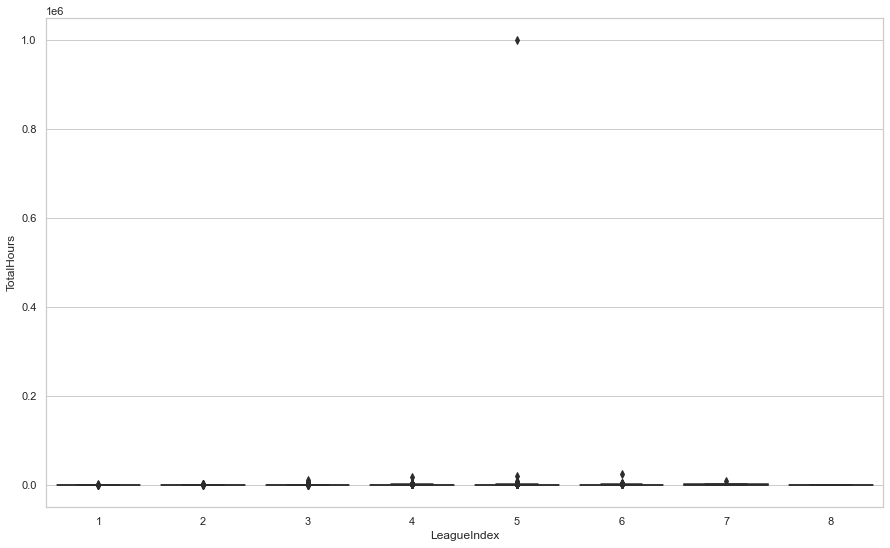

In [31]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="TotalHours", data=df,palette='flare')


###### We detect an anomaly in column 5, let's go fix it.#

In [32]:
df.sort_values(by="TotalHours",ascending=False)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
1793,5140,5,18,24,1000000,281.4246,0.023428,0.000799,5,0.000041,0.000447,0.005136,28.1164,36.1266,5.8522,29,0.001328,6,0.000000,0.000000
2324,6518,6,20,8,25000,247.0164,0.015794,0.000438,8,0.000308,0.001339,0.004645,17.6471,37.1837,6.5944,29,0.001860,6,0.000000,0.000012
770,2246,5,22,16,20000,248.0490,0.023703,0.000391,7,0.000000,0.000205,0.004651,37.8795,45.3760,4.7560,21,0.001526,6,0.000000,0.000000
1978,5610,4,22,10,18000,152.2374,0.011983,0.000206,1,0.000016,0.000364,0.003351,52.1896,63.9811,4.9575,19,0.000680,5,0.000000,0.000000
2216,6242,3,24,20,10260,76.5852,0.000780,0.000197,0,0.000063,0.000316,0.002438,42.9480,84.6340,5.9107,27,0.000450,10,0.000246,0.000358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,921,4,19,2,10,55.9674,0.000820,0.000315,1,0.000011,0.000045,0.003000,64.8271,83.0562,3.3296,15,0.000562,7,0.000000,0.000112
328,979,2,16,10,10,32.6730,0.001263,0.000111,0,0.000019,0.000056,0.001244,95.8788,119.1642,4.1493,10,0.000854,3,0.000000,0.000000
1502,4320,2,16,10,10,44.9700,0.001562,0.000134,4,0.000000,0.000000,0.001741,156.6234,110.6154,3.8462,18,0.000647,5,0.000000,0.000000
402,1207,4,16,2,7,111.3582,0.004802,0.000150,0,0.000060,0.000360,0.002551,64.2381,71.8118,6.2000,17,0.001531,4,0.000000,0.000000


###### Line 1793, the player has indicated that he has played 1000000 hours. This value is an error, so we will remove his line for the plot.

In [33]:

df2 = df.drop(df.index[1793])


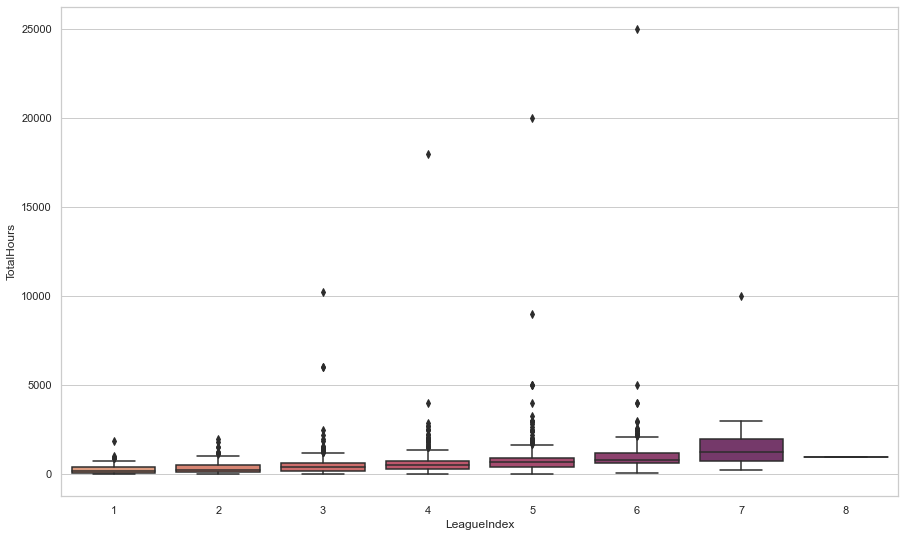

In [34]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="TotalHours", data=df2,palette='flare')

######  As this game is very time consuming, it is no surprise that the best players have the most playing time.#
######  There is a correlation between these two variables.
######  Here is another version of the plot, more realistic because less crushed.
 

Text(0, 0.5, 'Number of players (%)')

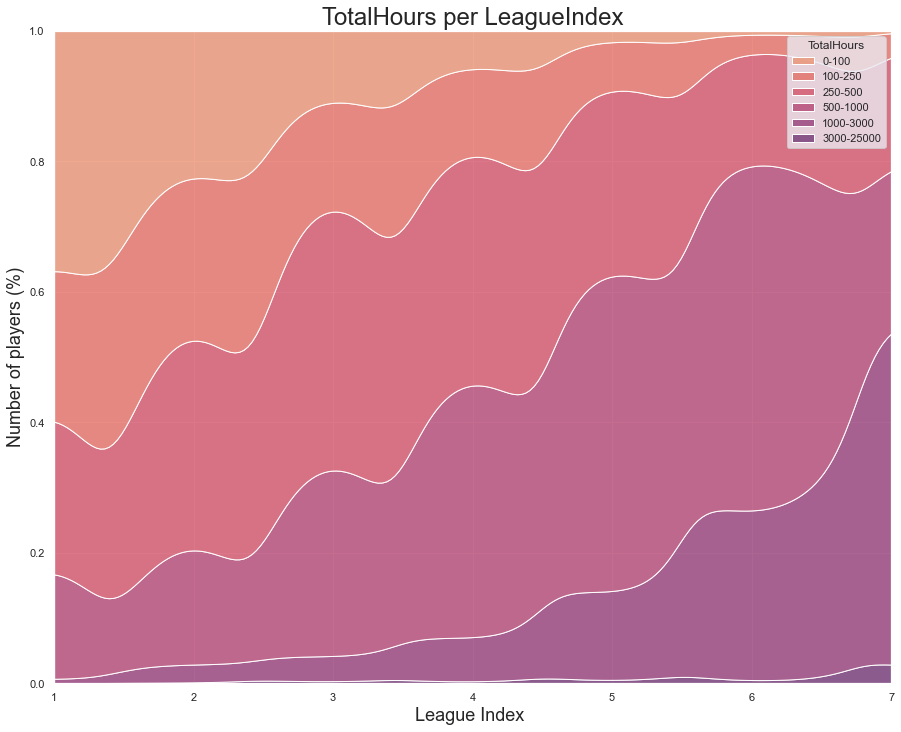

In [35]:
#CODE PLOT HISTO TOTALHOURS / LEAGUEINDEX

dfInterval.TotalHours = pd.cut(dfInterval.TotalHours, bins=[0, 100,250, 500, 1000, 3000, 25000], 
                        include_lowest=True, precision=0, ordered = False, labels = ["0-100", "100-250", "250-500", "500-1000", "1000-3000", "3000-25000"])
sns.set(rc={'figure.figsize':(15,12)})



ax = sns.kdeplot(x="LeagueIndex", hue="TotalHours", data = dfInterval, shade=True, palette="flare", cut=0, multiple="fill")
plt.title("TotalHours per LeagueIndex", fontsize =24)
plt.xlabel('League Index ', fontsize=18)
plt.ylabel('Number of players (%)', fontsize=18)


#FIN

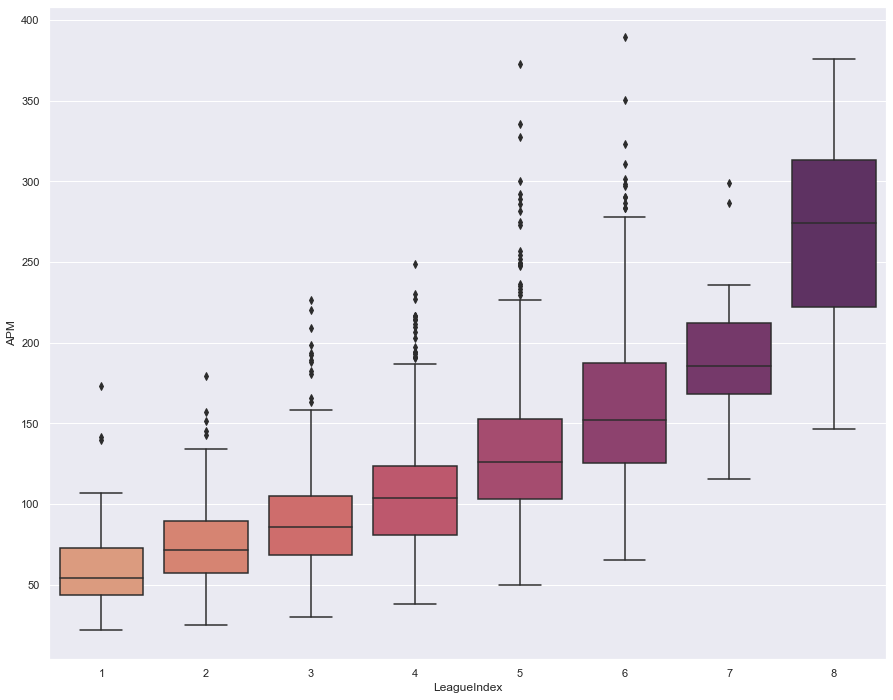

In [36]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="APM", data=df,palette='flare')

###### This one speaks for itself!
###### For those who don't know what APMs are, it stands for "Action Per Minute".
###### It is completely logical in such a game, you have to manage dozens of units at the same time, keep a perfect organization, do tons of things!
###### The correlation is important, and we can already assume that this variable will be very important for our future models.

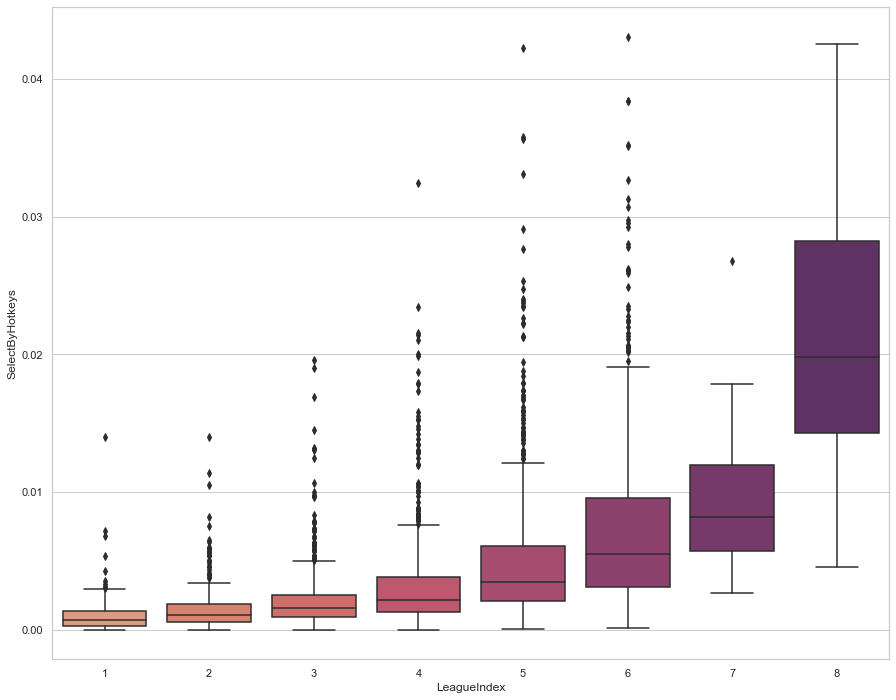

In [37]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="SelectByHotkeys", data=df,palette='flare')

###### This variable 'Select By Hotkeys' is the number of unit or building selections made using hotkeys per timestamp (continuous).
###### This means that the player must know his shortcuts to use them wisely.
###### Unsurprisingly, a novice player will use his mouse rather than his shortcuts.
###### Using these shortcuts takes a lot of learning to be effective.
###### Not surprisingly again, this correlation is huge, there is a real gap between the professional players and the others.

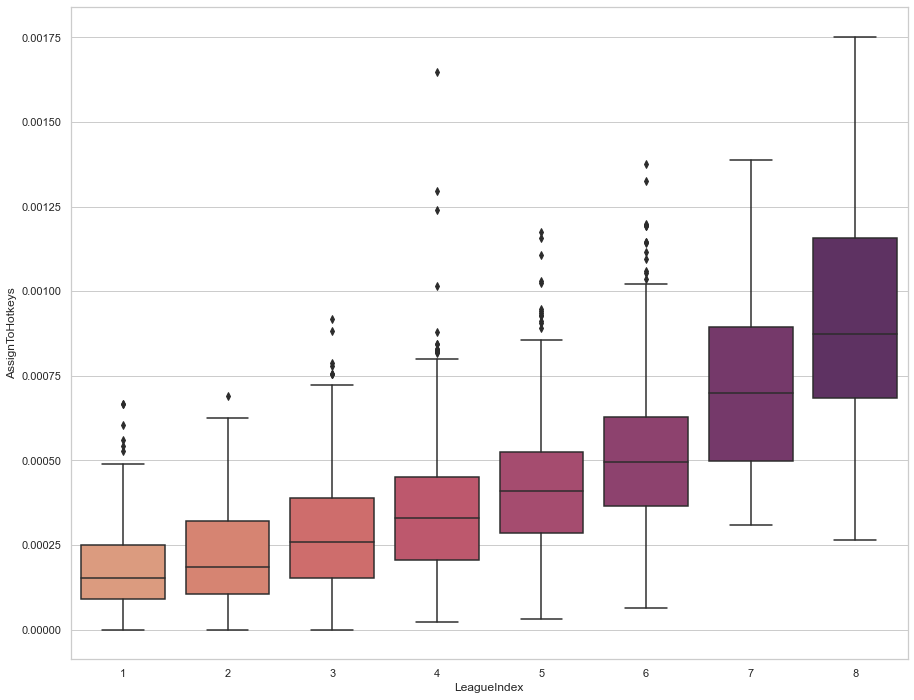

In [38]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="AssignToHotkeys", data=df,palette='flare')

###### This variable 'Assign to Hotkeys' is the number of units or buildings assigned to hotkeys per timestamp (continuous).
###### In addition to the previous graph, the more shortcuts a player has assigned to various actions, the better he is.
###### Same interpretation as above, it requires knowledge and a lot of training to be able to choose the right shortcuts and to use them.
###### This correlation is once again very strong.

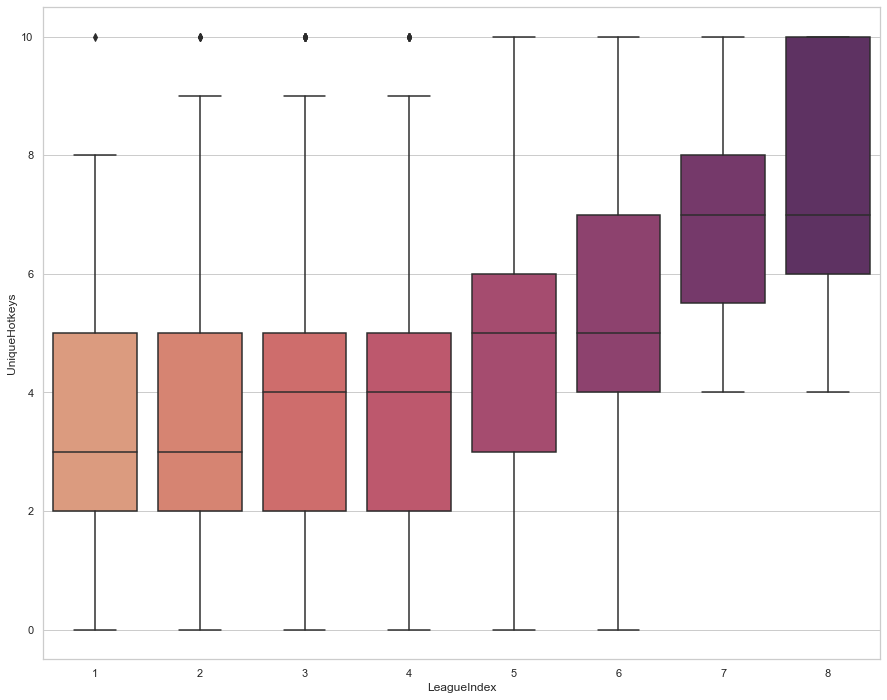

In [39]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="UniqueHotkeys", data=df,palette='flare')

###### This variable 'Unique Hotkeys' is the number of unique hotkeys used per timestamp (continuous).
###### Up to the platinum rank we don't have a very high correlation.
###### However, from the diamond rank onwards, the number of different shortcuts used is correlated with the rank.
###### A very good player will use between 6 and 10 (the maximum) different shortcuts, while a master player will use between 4 and 7.
###### To be the best at starcraft2, it seems to be better to be able to play with many different shortcuts, which shows a great mastery of the game.



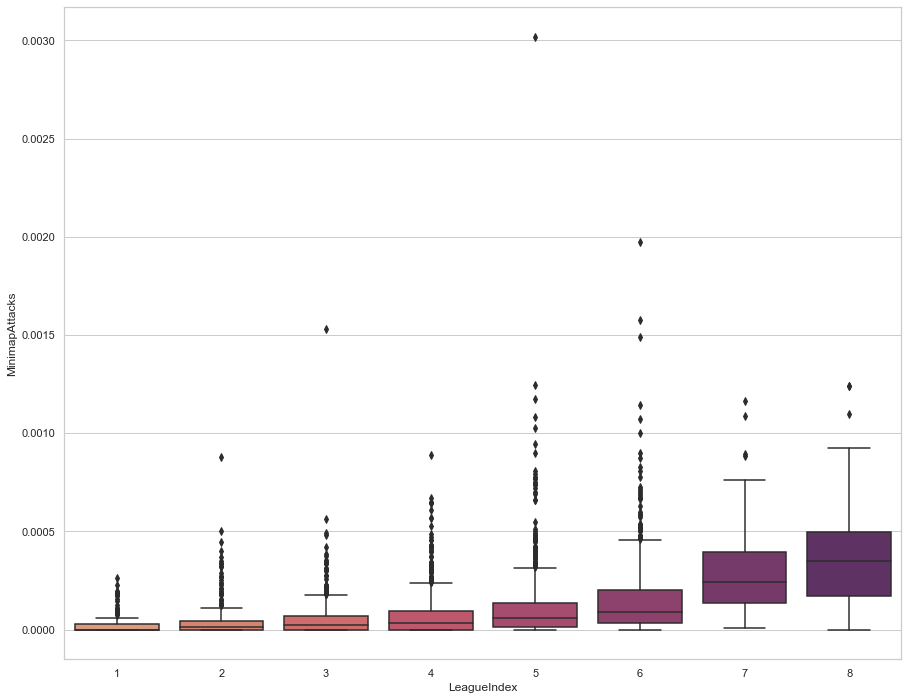

In [40]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="MinimapAttacks", data=df,palette='flare')

###### This variable 'Minimap Attacks' is the number of attack actions on minimap per timestamp (continuous).
###### Another positively correlated variable, the best players are those who do the most attacking via the minimap. 
###### This certainly saves some time, but it is still necessary to be able to master this ability.


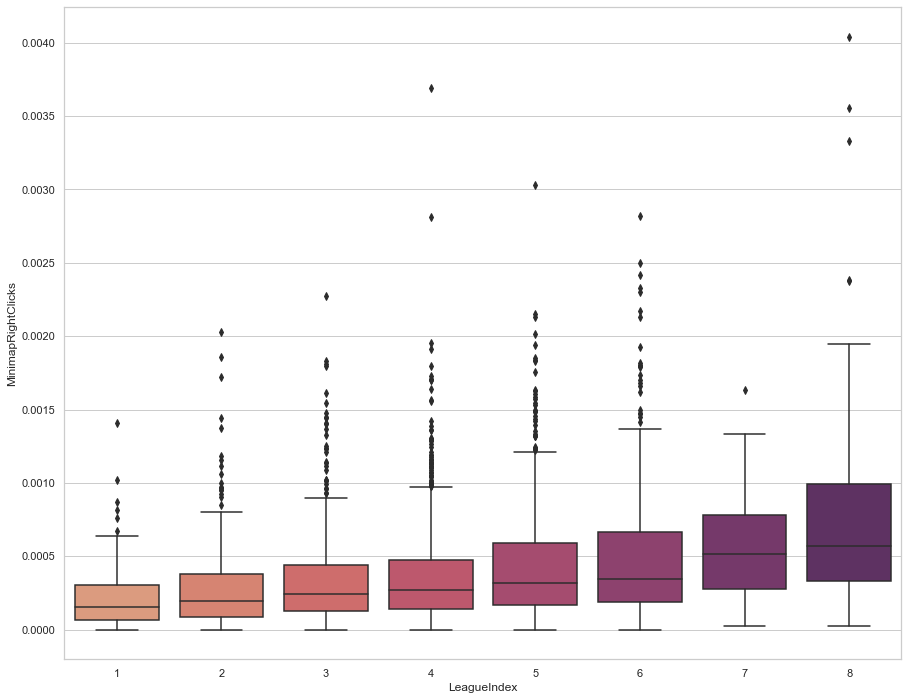

In [41]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="MinimapRightClicks", data=df,palette='flare')

###### The right click allows you to do many things on this game. Not surprisingly, those who are able to use the right click via minimap and do the most are the best players.
###### This reflects a certain skill and a great mastery of the game.

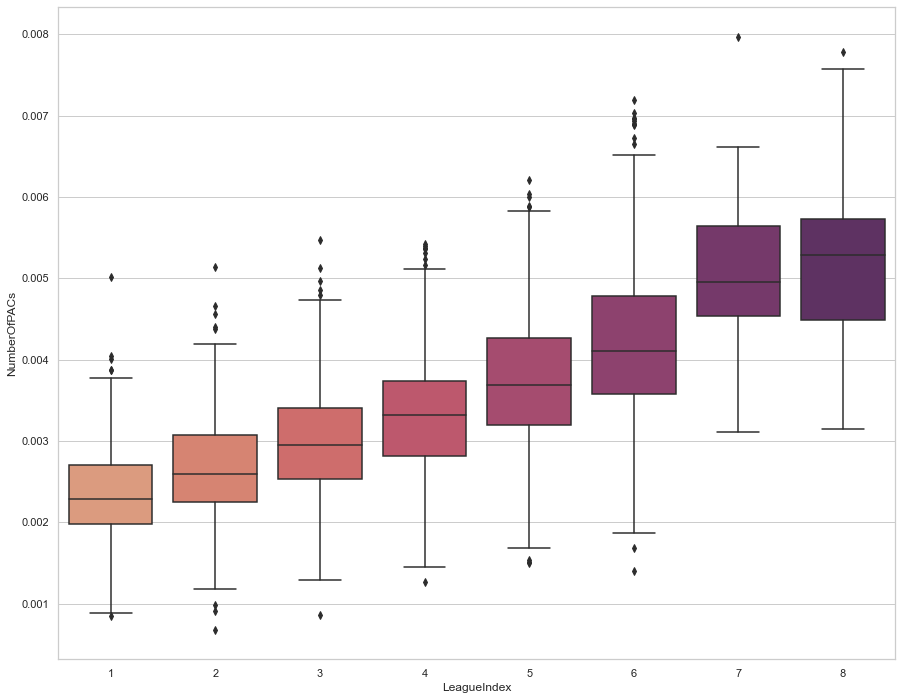

In [42]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="NumberOfPACs", data=df,palette='flare')

###### We went to find out what PACs were:  
###### Perception Action Cycle, this is apparently a very well-known indicator in the world of competitive video games.
###### The more PACs you have, the better you are at the game.
###### And this variable doesn't seem to be wrong! 
###### Indeed, the best players have the highest number of PACs.

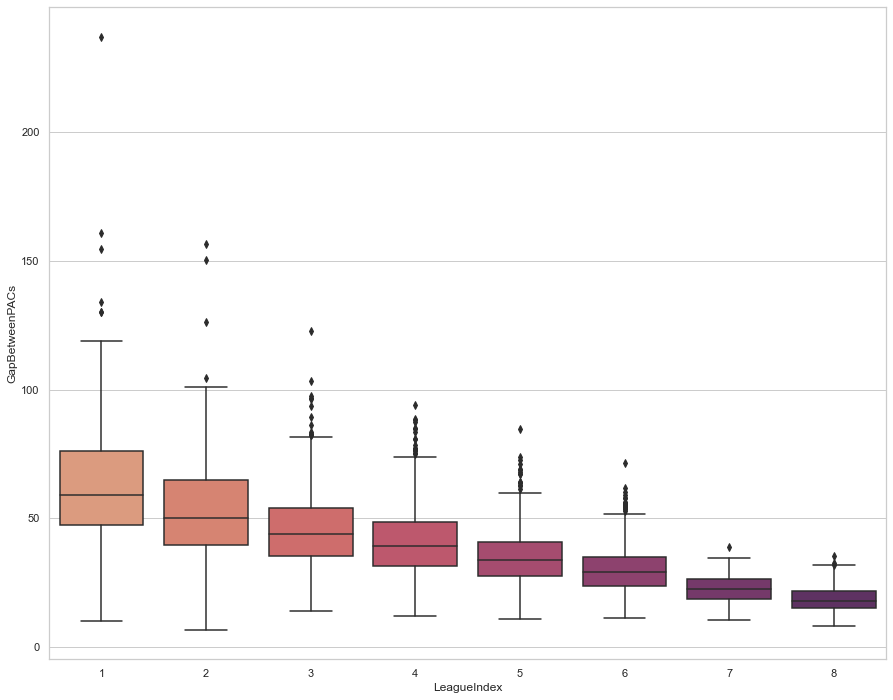

In [43]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="GapBetweenPACs", data=df,palette='flare')

###### The fastest and most experienced players are the ones who can string together their PACs.
###### The beginners and the less fast players will space their PACs which will slow down their game.
###### Unsurprisingly, they will win less because they are less active and therefore less efficient than their opponents.

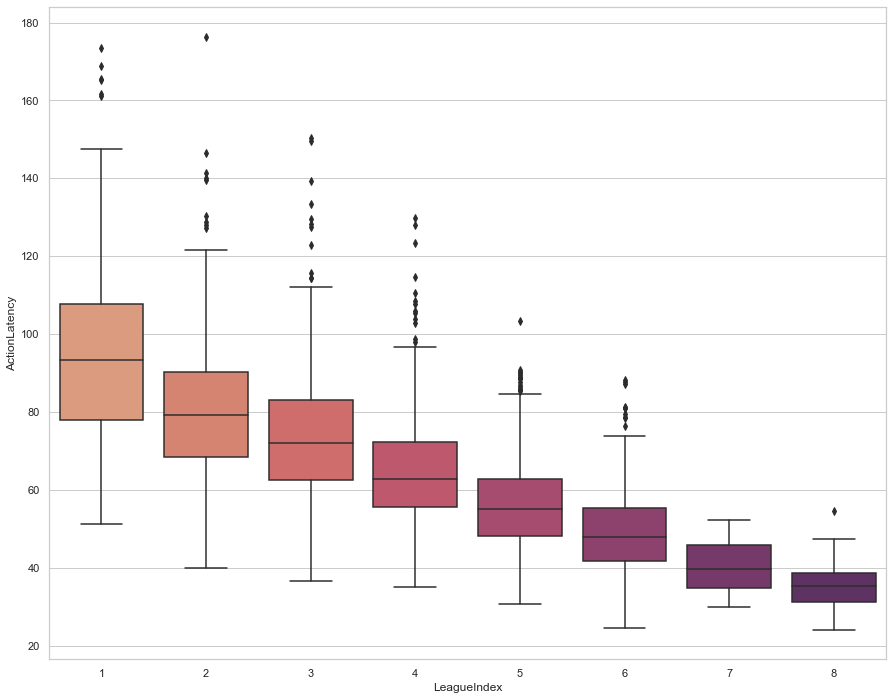

In [44]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="ActionLatency", data=df,palette='flare')

###### Almost the same as above, the more time a player lets pass between his actions, the worse he is.
###### To be good at Starcraft2, you have to go very fast, constantly think about your next move, and not give your opponent any time to breathe.
###### The best players are those who optimize their time the most.

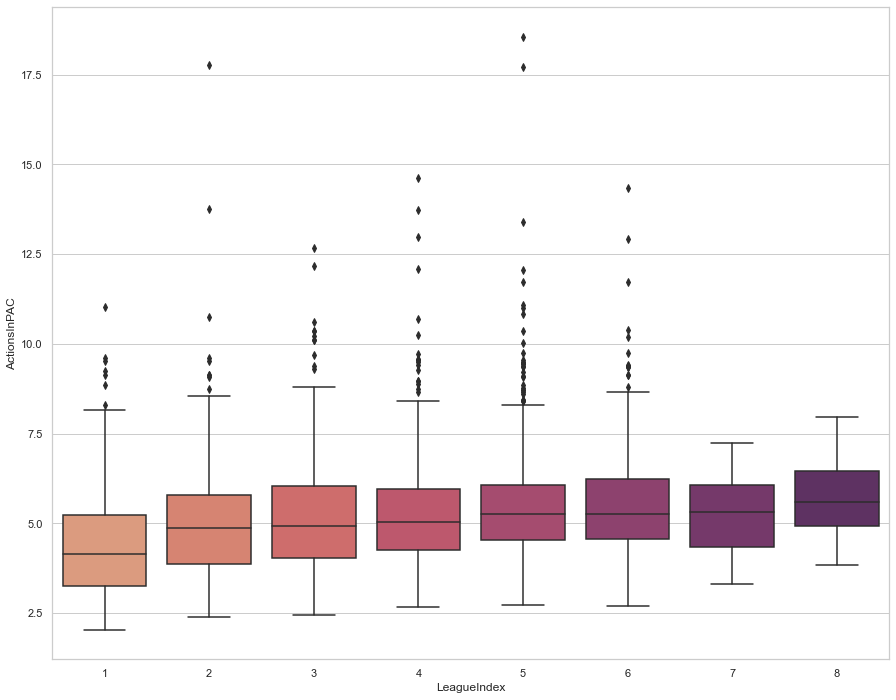

In [45]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="ActionsInPAC", data=df,palette='flare')

###### Very slight correlation on this variable.
###### It is better to focus on the total number of PACs than on the number of actions in each PAC.

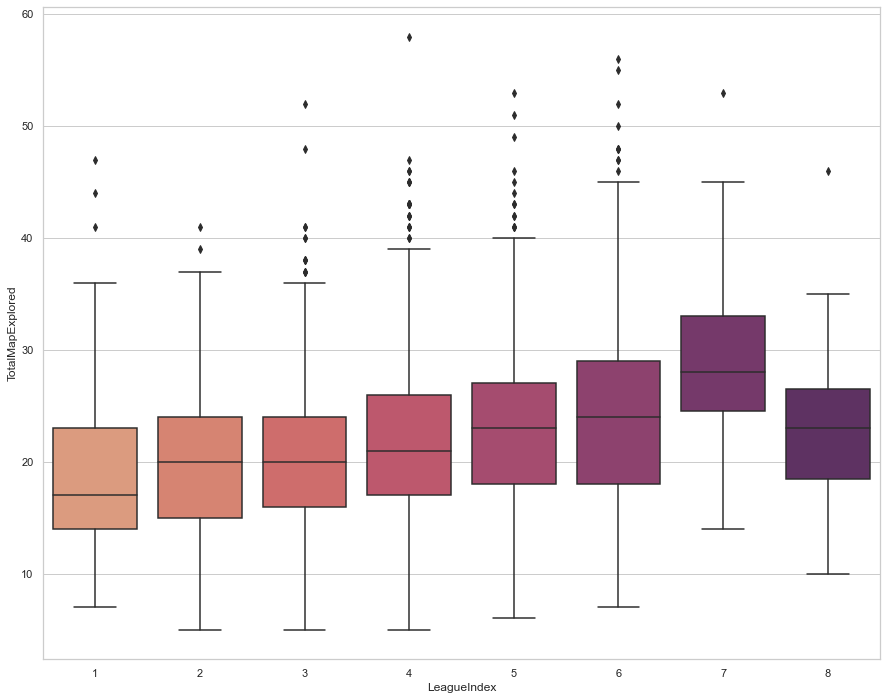

In [46]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="TotalMapExplored", data=df,palette='flare')

###### This variable 'Total Map Explored' is the number of 24x24 game coordinate grids viewed by the player per timestamp (continuous).
###### This variable is positively correlated with the player's rank, up to the grandmaster rank.
###### After that it seems that the best players explore the map less.
###### This may be due to the fact that professional players need to explore less before attacking. They are more efficient in their exploration and therefore have better information about the enemies.
###### Perhaps the professional level games are shorter and therefore leave less time to explore the map.

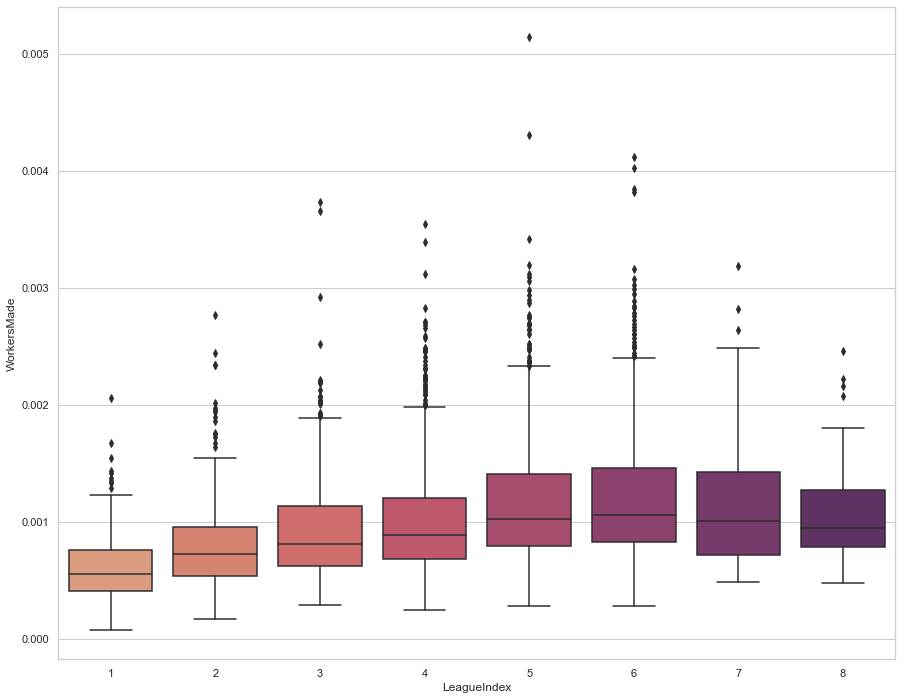

In [47]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="WorkersMade", data=df,palette='flare')


###### Variable very slightly correlated up to grandmaster.
###### Making more units makes you better at the game.
###### However, pro players do a bit less than other ranks, probably because they are more efficient with fewer units, or their games are shorter.

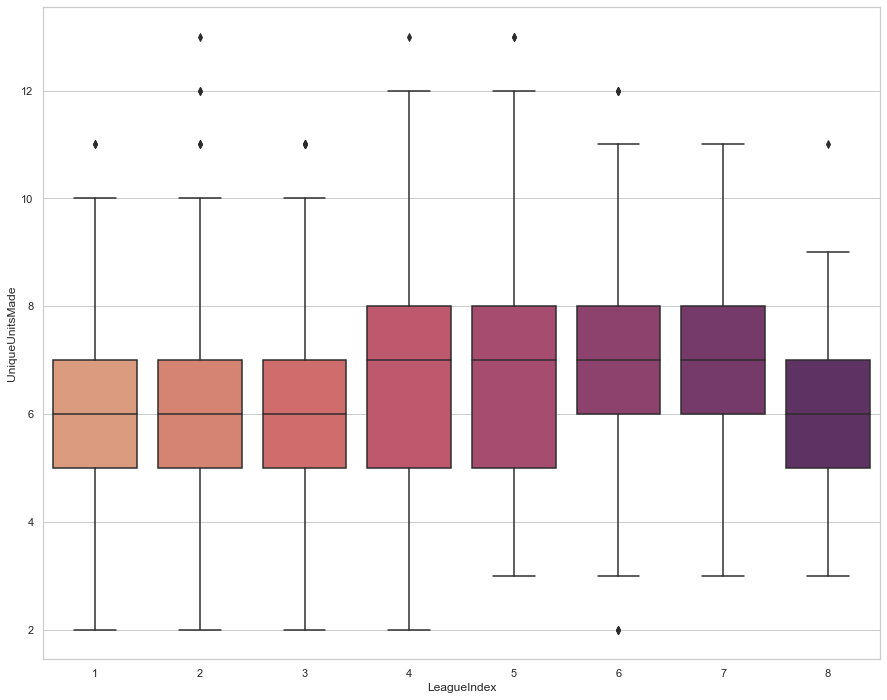

In [48]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="UniqueUnitsMade", data=df,palette='flare')

###### The diversity of units created in starcraft2 is a slight indicator of better performance.
###### However, the best players use a smaller variety of units. 

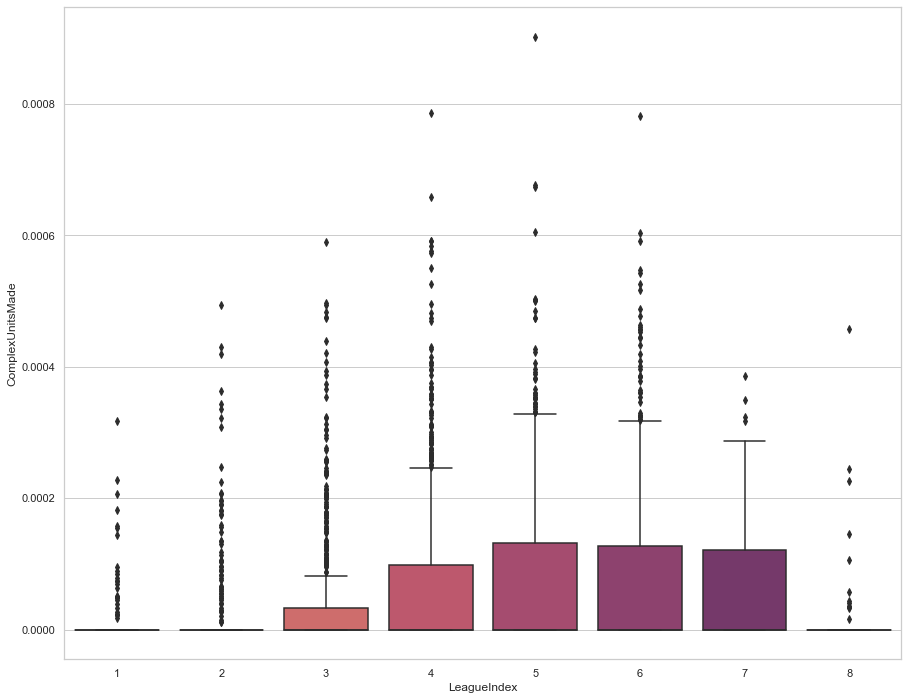

In [49]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="ComplexUnitsMade", data=df,palette='flare')

###### This variable is positively correlated, up to the grandmaster, the more a player uses a "complex" unit the better he is.
###### However, most pro players do not use any.
###### This type of unit should not be the most effective in competition against experienced players.

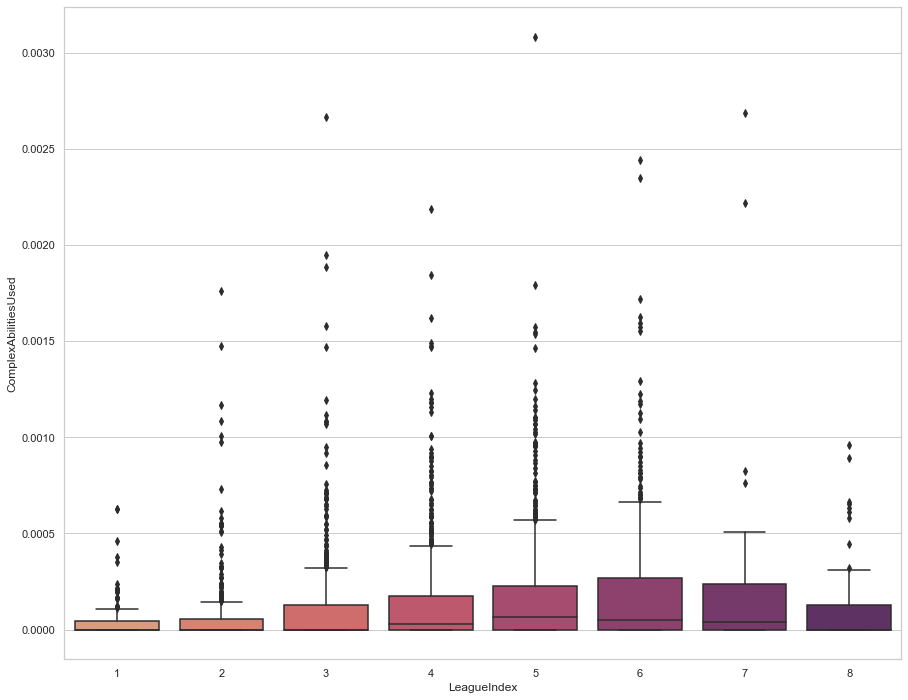

In [50]:
fig, ax =plt.subplots(1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="LeagueIndex", y="ComplexAbilitiesUsed", data=df,palette='flare')

###### Same hypothesis as above.
###### Using complex abilities is probably less effective at the professional level.
###### This variable is still positively correlated.

###### Most of the variables are highly correlated with the level of the players.
###### However, we notice that for some variables, the correlation only occurs up to the grandmaster rank.
###### It seems that the professional players play in a slightly different way, more efficient, faster.
###### It could be interesting to use future prediction models without professional players, to see if it improves the performance of the models.



ValueError: Unknown format code 'd' for object of type 'float'

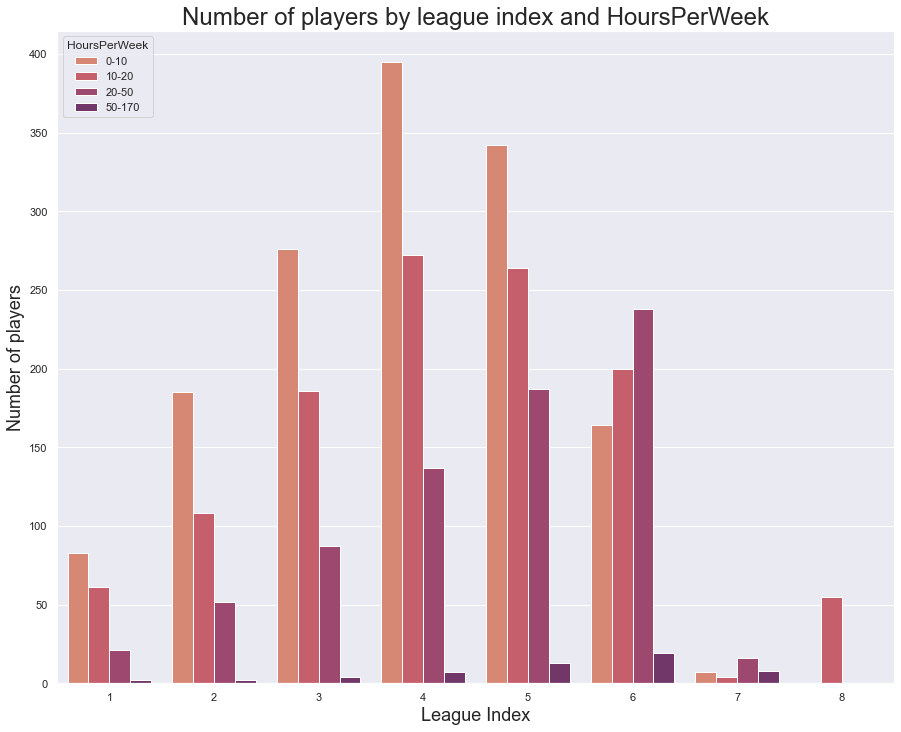

In [51]:
#CODE PLOT HISTO LEAGUEINDEX / HOURSPERWEEK
dfInterval = df.copy()
dfInterval.HoursPerWeek = pd.cut(dfInterval.HoursPerWeek, bins=[0, 10, 20, 50, 170], 
                        include_lowest=True, precision=0, ordered = False, labels = ["0-10", "10-20", "20-50", "50-170"])

sns.set(rc={'figure.figsize':(15,12)})

ax = sns.countplot(x="LeagueIndex", hue="HoursPerWeek", data = dfInterval, palette="flare")
plt.title("Number of players by league index and HoursPerWeek", fontsize =24)
plt.ylabel('Number of players', fontsize=18)
plt.xlabel('League Index', fontsize=18)
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), xy=(p.get_x() + 0.105, p.get_height() - 15), fontsize=15, color='#d3dae6', ha='center', va="center", weight='bold')

#FIN

In [52]:
y = df['LeagueIndex']
X = df[['Age','HoursPerWeek','TotalHours','APM','SelectByHotkeys','AssignToHotkeys','UniqueHotkeys','MinimapAttacks','MinimapRightClicks','NumberOfPACs','GapBetweenPACs','ActionLatency','ActionsInPAC','TotalMapExplored','WorkersMade','UniqueUnitsMade','ComplexUnitsMade','ComplexAbilitiesUsed']]
Xa = df[['HoursPerWeek','TotalHours','APM','SelectByHotkeys','AssignToHotkeys','MinimapAttacks','MinimapRightClicks','NumberOfPACs','GapBetweenPACs','ActionLatency']]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xa, y, test_size = 0.25, random_state = 12)

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);

predictions = rf.predict(X_test)
    

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score

pred = [int(round(x)) for x in predictions]
conf_mat = confusion_matrix(y_test, pred)
print(conf_mat)
print("Accuracy : ",accuracy_score(y_test, pred))

[[  0  25  12   2   1   0   0   0]
 [  2  27  43  16   2   0   0   0]
 [  0  11  60  44  12   0   0   0]
 [  0   5  49  86  65   4   0   0]
 [  0   1  14  76 123  15   0   0]
 [  0   0   0  15  74  49   0   0]
 [  0   0   0   0   0   5   0   0]
 [  0   0   0   0   0   1   2   8]]
Accuracy :  0.41578327444051827


# LOGISTIC REG


In [56]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.411296 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.410904 (0.022775) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.385274 (0.026519) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.391173 (0.024096) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.411296 (0.021985) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.386060 (0.026230) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.389211 (0.026326) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.410904 (0.022582) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.384883 (0.026361) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.390193 (0.024592) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.410902 (0.022444) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.382811 (0.027324) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.393234 (0.022435) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.408739 (0.024657) with

C:\Users\33628\anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


# KNN

In [58]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define dataset
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.388514 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
0.314678 (0.026709) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.314678 (0.026709) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.319588 (0.022140) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.328724 (0.025777) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.352765 (0.024964) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.348252 (0.022254) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.355818 (0.020905) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.358764 (0.022605) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.367985 (0.020645) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.369561 (0.019696) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.370439 

# SVC

In [59]:
# example of grid searching key hyperparametres for SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define dataset
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.308292 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.247999 (0.028319) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.308292 (0.032979) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.283184 (0.033176) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.245646 (0.021529) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.286293 (0.037798) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.270219 (0.024907) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.242313 (0.011419) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.256537 (0.036296) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.235549 (0.015005) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.239862 (0.003044) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.247607 (0.026349) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.240352 (0.006416) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.238980 (0.001125) with: {'C': 0.01, 'gamma': 'scale', 

# BAGGING CLASSIFIER

In [60]:
# example of grid searching key hyperparameters for BaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
# define dataset
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.425627 using {'n_estimators': 1000}
0.387229 (0.019646) with: {'n_estimators': 10}
0.419736 (0.018443) with: {'n_estimators': 100}
0.425627 (0.024802) with: {'n_estimators': 1000}


# RANDOM FOREST

In [61]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.426021 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.380666 (0.027381) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.421996 (0.022594) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.426021 (0.021539) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.370541 (0.024042) with: {'max_features': 'log2', 'n_estimators': 10}
0.420522 (0.023859) with: {'max_features': 'log2', 'n_estimators': 100}
0.424349 (0.023829) with: {'max_features': 'log2', 'n_estimators': 1000}
